In [118]:
import pandas as pd
import numpy as np
data = pd.read_csv("train.csv")

In [119]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2)

In [146]:
new_train_data = train_data[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin']]
new_train_data = new_train_data.replace([np.inf, -np.inf], np.nan)
new_test_data=test_data[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin']]

In [156]:
# I really just cleaned the data set by dropping NAN values and dropping columns that weren't necessary for my evaluations.
# I dropped the "Port of Emarkation" column because I felt that it didn't matter where they got on the boat from as they all still
# ended up in the same place... I also dropped the "Ticket number" column becuase it seemed like just another way to identify
# passengers but we already have PassengerID. Lastly I dropped "Fare" because I didn't think the price of the ticket really mattered.

new_train_data = new_train_data.dropna()
new_test_data = new_test_data.dropna()

In [122]:
new_train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
62,63,0,1,male,45.0,1,0,C83
88,89,1,1,female,23.0,3,2,C23 C25 C27
820,821,1,1,female,52.0,1,1,B69
263,264,0,1,male,40.0,0,0,B94
434,435,0,1,male,50.0,1,0,E44


In [123]:
from sklearn.preprocessing import LabelEncoder


In [158]:
# Dealing with categorical data was pretty easy for this data set since sex was a binary column we could easy do
# 0 and 1 encoding. 
labelencoder = LabelEncoder()
new_train_data['Sex'] = labelencoder.fit_transform(new_train_data['Sex'])
new_test_data['Sex'] = labelencoder.fit_transform(new_test_data['Sex'])

C:\Users\bella\AppData\Local\Temp\ipykernel_26468\243121171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train_data['Sex'] = labelencoder.fit_transform(new_train_data['Sex'])


In [159]:
new_train_data['Cabin'] = labelencoder.fit_transform(new_train_data['Cabin'])
new_train_data.head()

C:\Users\bella\AppData\Local\Temp\ipykernel_26468\4220376548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train_data['Cabin'] = labelencoder.fit_transform(new_train_data['Cabin'])


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
62,63,0,1,1,45.0,1,0,64
88,89,1,1,0,23.0,3,2,51
820,821,1,1,0,52.0,1,1,30
263,264,0,1,1,40.0,0,0,37
434,435,0,1,1,50.0,1,0,103


In [126]:
# Here we have a correlation matrix with a passengers socioeconomic status (as determined by Pclass) and all the other attributes
socioeconomic_status_matrix = new_train_data.corr()['Pclass']
socioeconomic_status_matrix

PassengerId   -0.082260
Survived      -0.050795
Pclass         1.000000
Sex           -0.049200
Age           -0.279832
SibSp         -0.138221
Parch          0.029491
Cabin          0.466973
Name: Pclass, dtype: float64

In [127]:
# Clearly as we can see here there is the a high correlation between the socioeconomic status and the age.
# The negative correlation shows that as age goes up, socioeconomic class tends to go "down"
# however due the encoding, this actually means that the older people are more affluent.
# There is also a high correlation between cabin and socioeconomic status

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

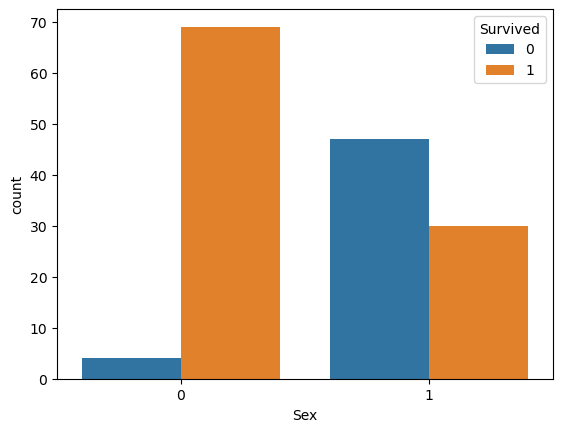

In [129]:
# Here we are going to see what the important attributes seem to be by graphing them against the proportion of surviving passengers
# Side note: I did not remove outliers as part of the EDA because as you can see on these below graphs, there doesn't seem to be any outliers
sns.countplot(x="Sex", hue=new_train_data["Survived"].astype(str), data=new_train_data)
plt.show()
# 0 = female 1 = male

C:\Users\bella\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


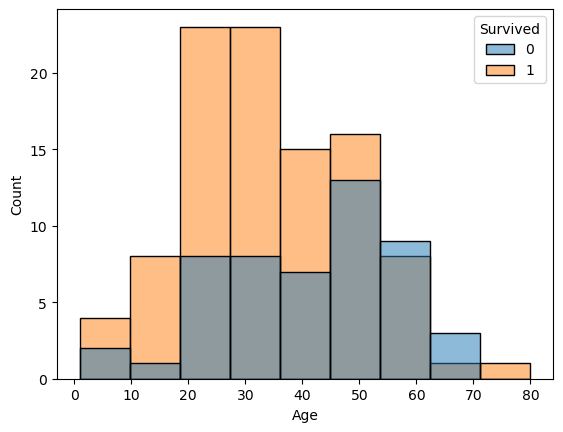

In [130]:
sns.histplot(data=new_train_data, x= new_train_data["Age"], hue="Survived")
        
plt.show()

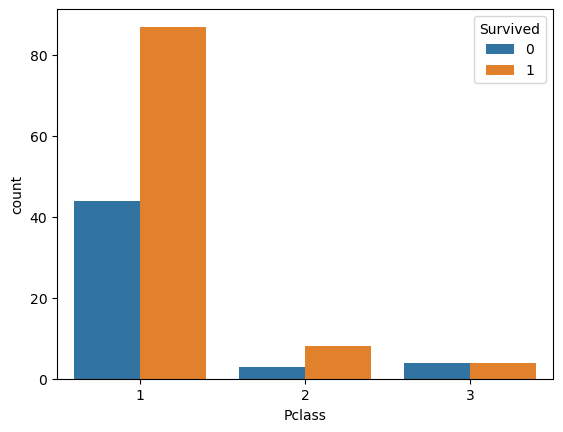

In [131]:
sns.countplot(x="Pclass", hue=new_train_data["Survived"].astype(str), data=new_train_data)
plt.show()

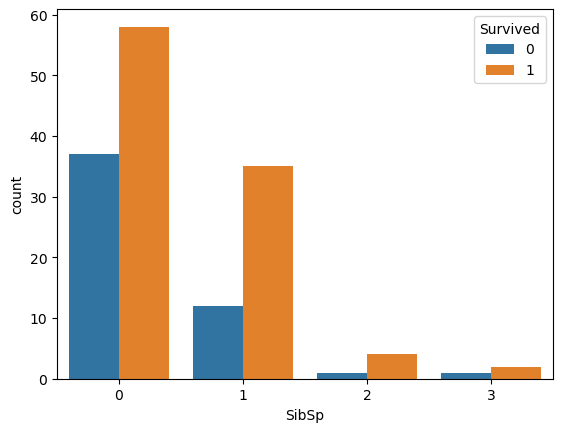

In [132]:
sns.countplot(x="SibSp", hue=new_train_data["Survived"].astype(str), data=new_train_data)
plt.show()

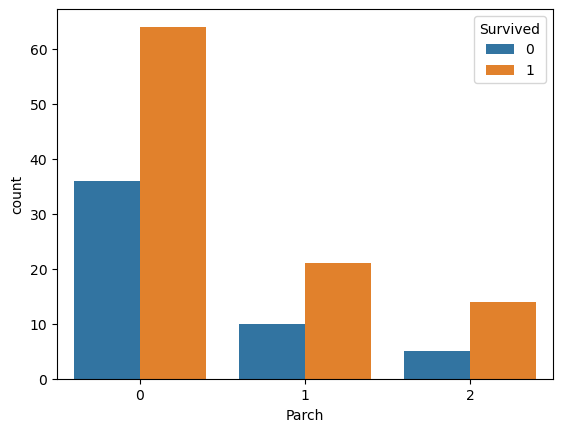

In [133]:
sns.countplot(x="Parch", hue=new_train_data["Survived"].astype(str), data=new_train_data)
plt.show()

In [142]:
# Here we have a correlation matrix so we can once again confirm which features are important
new_train_data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
PassengerId,1.000000,0.021602,-0.041003,0.029598,0.042634,-0.060683,-0.011294,-0.025955
Survived,0.021602,1.000000,-0.343376,-0.573236,-0.035092,-0.023915,0.091022,-0.257337
Pclass,-0.041003,-0.343376,1.000000,0.134417,-0.397078,0.078316,0.003588,0.689342
Sex,0.029598,-0.573236,0.134417,1.000000,0.115031,-0.124176,-0.251512,0.085964
Age,0.042634,-0.035092,-0.397078,0.115031,1.000000,-0.316954,-0.212164,-0.298752
SibSp,-0.060683,-0.023915,0.078316,-0.124176,-0.316954,1.000000,0.437123,0.048420
Parch,-0.011294,0.091022,0.003588,-0.251512,-0.212164,0.437123,1.000000,-0.025222
Cabin,-0.025955,-0.257337,0.689342,0.085964,-0.298752,0.048420,-0.025222,1.000000


In [206]:
# as we can see, sex and class are the two biggest factors in survival and they arent highly correlated with each other so we can
# perform a logistic regression. Logistic regression is a ML model that creates a "decision boundary" where items will be labeled
# with either class 0 (died) or class 1 (survived) based on a probability calculated using the attributes given in this case Sex and Pclass.

In [167]:
x = new_train_data[['Sex','Pclass']]

In [168]:
y=new_train_data['Survived']

In [169]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2)

In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_predict, LeaveOneOut

In [171]:
model1=LogisticRegression()

In [182]:
model1.fit(x_train, y_train)
plt.show()

In [176]:
survival_prediction = model1.predict(x_test)
accuracy_score(y_test, survival_prediction)

0.7666666666666667

In [234]:
print(classification_report(y_test, survival_prediction))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80        15
           1       0.90      0.60      0.72        15

    accuracy                           0.77        30
   macro avg       0.80      0.77      0.76        30
weighted avg       0.80      0.77      0.76        30



In [227]:
leaveoneout = LeaveOneOut()
model1crossval = cross_val_predict(LogisticRegression(), x, y, cv=leaveoneout)
# as we can see here, the cross validation decreased the precision for the 0 class, but overall increased the weighted average of all
# measures of accuracy. The model seems to be working well with an f score of 0.78

In [235]:
print(classification_report(y, model1crossval))

              precision    recall  f1-score   support

           0       0.61      0.92      0.73        51
           1       0.95      0.70      0.80        99

    accuracy                           0.77       150
   macro avg       0.78      0.81      0.77       150
weighted avg       0.83      0.77      0.78       150



In [201]:
from sklearn.neighbors import KNeighborsClassifier

# The next model I chose was K nearest neighbors. K nearest neighbors works by taking a point and finding the distance
# from the training points using distance metrics, and then the point is labeled by its "nearest neighbor", aka
# the label of the point with the shortest distance metric. The reason I chose K to be 3 was basically just trial and error.
# For binary classifiers you shouldn't choose an even number because of the "voting" method of which nearest neighbor a point belongs to.
# So I tested out 1, 3, 5, 7, and found that 3 resulted in the highest accuracy.
model2 = KNeighborsClassifier(n_neighbors=3)

model2.fit(x_train, y_train)

knn_survival_predict = model2.predict(x_test)

In [236]:
print(classification_report(y_test, knn_survival_predict))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80        15
           1       0.90      0.60      0.72        15

    accuracy                           0.77        30
   macro avg       0.80      0.77      0.76        30
weighted avg       0.80      0.77      0.76        30



In [229]:
model2crossval = cross_val_predict(KNeighborsClassifier(n_neighbors=3), x, y, cv=leaveoneout)
# The cross validation here lowered the measures of accuracy for the 0 class but raised them for the 1 class. Overall we have
# similar weighted averages both before and after the cross validation. 

In [237]:
print(classification_report(y, model2crossval))

              precision    recall  f1-score   support

           0       0.60      0.88      0.71        51
           1       0.92      0.70      0.79        99

    accuracy                           0.76       150
   macro avg       0.76      0.79      0.75       150
weighted avg       0.81      0.76      0.77       150



In [203]:
from sklearn.ensemble import RandomForestClassifier
# My last model was a random forest classifier. The way the random forest works is by making multiple decision trees, 
# which recursively determine probabilities and make a new node based on those probabilities until it makes a final label.
# Random forest makes multiple decision trees, and then whichever label is the majority out of all the decision trees is the final label
model3 = RandomForestClassifier()
model3.fit(x_train,y_train)

rf_survival_predict=model3.predict(x_test)


In [238]:
print(classification_report(y_test, rf_survival_predict))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80        15
           1       0.90      0.60      0.72        15

    accuracy                           0.77        30
   macro avg       0.80      0.77      0.76        30
weighted avg       0.80      0.77      0.76        30



In [231]:
model3crossval = cross_val_predict(RandomForestClassifier(), x, y, cv=leaveoneout)
# once again the cross validation had better results for class 1 and overall did not have much effect.

In [233]:
print(classification_report(y, model3crossval))

              precision    recall  f1-score   support

           0       0.60      0.88      0.71        51
           1       0.92      0.70      0.79        99

    accuracy                           0.76       150
   macro avg       0.76      0.79      0.75       150
weighted avg       0.81      0.76      0.77       150



In [ ]:
# After trying all 3 models I would decide on Logistic regression with cross validation. This had the hihgest weighted averages for 
# precision, recall, and fscore which is why I think overall it is the best for this data set. 